# <font color="#DE1509">Distributions</font>
A function that describes the probability that a system will take on a specific value or set of values.  
*"A distribution is simply a collection of data, or scores, on a variable. Usually, these scores are arranged in order from smallest to largest and then they can be presented graphically."*  
\- Page 6, Statistics in Plain English, Third Edition, 2010.

\
<font color="#029DA3">**Probability Distribution**</font>

- *Discrete Distributions*  
A discrete probability function is a function that can take a discrete number of values (not necessarily finite). This is most often the non-negative integers or some subset of the non-negative integers. There is no mathematical restriction that discrete probability functions only be defined at integers, but in practice this is usually what makes sense. For example, if you toss a coin 6 times, you can get 2 heads or 3 heads but not 2 1/2 heads. Each of the discrete values has a certain probability of occurrence that is between zero and one. That is, a discrete function that allows negative values or values greater than one is not a probability function. The condition that the probabilities sum to one means that at least one of the values has to occur.

- *Continuous Distributions*  
Since continuous probability functions are defined for an infinite number of points over a continuous interval, the probability at a single point is always zero. Probabilities are measured over intervals, not single points. That is, the area under the curve between two distinct points defines the probability for that interval. This means that the height of the probability function can in fact be greater than one. The property that the integral must equal one is equivalent to the property for discrete distributions that the sum of all the probabilities must equal one.  

A probability distribution indicates the probability of a particular event. Probability distributions can show simple events, like tossing a coin or picking a card. They can also show much more complex events, like the probability of a certain drug successfully medical treatment.  
  
There are two types of probability distribution, discrete distributions and continuous distributions.  

\
<font color="#029DA3">**Probability Density Function (PDF)**</font>

A probability density function, or PDF, can be used to calculate the likelihood of a given observation in a distribution. It can also be used to summarize the likelihood of observations across the distribution's sample space. Plots of the PDF show the familiar shape of a distribution, such as the bell-curve for the Gaussian (normal) distribution.  

PDFs are continuous functions. The equivalent of a PDF for a discrete distribution is called a probability mass function, or **PMF**
.

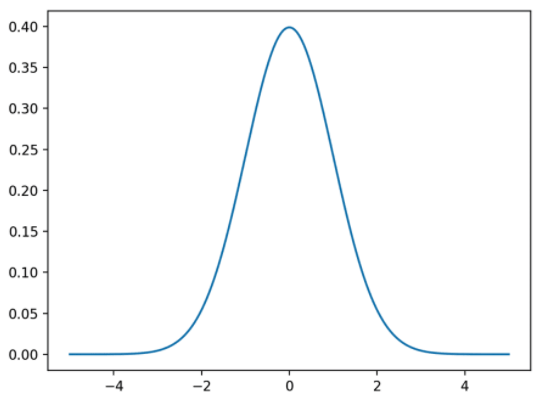

\
<font color="#029DA3">**Cumulative Density function (CDF)**</font>

A cumulative density function, or CDF, is a different way of thinking about the likelihood of observed values. Rather than calculating the likelihood of a given observation as with the PDF, the CDF calculates the cumulative likelihood for the observation and all prior observations in the sample space. It allows you to quickly understand and comment on how much of the distribution lies before and after a given value. A CDF is often plotted as a curve from 0 to 1 for the distribution.

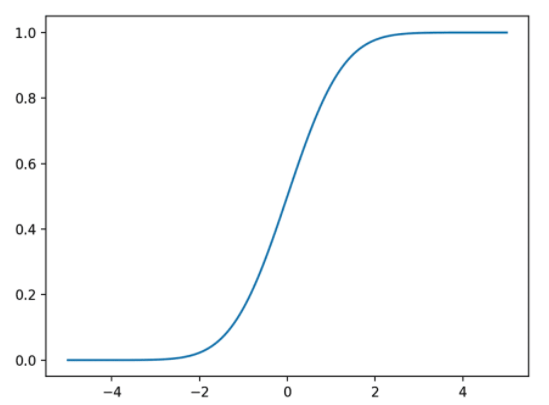

&nbsp;   
#### <font color="#127C02">*Gaussian / Normal Distribution*</font>
The Gaussian distribution, also known as the "normal" distribution, is a type of continuous probability distribution for a real-valued random variable.    
Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes, such as measurement errors, often have distributions that are nearly normal.  
  
A normal distribution is sometimes informally called a bell curve.However, many other distributions are bell-shaped (such as the Cauchy, Student's t, and logistic distributions).

\
In Python, we can use the library SciPy to generate data with normal distribution.

In [1]:
import numpy as np
from scipy import stats
sample_norm = stats.norm.rvs(loc=0, #loc is mean (mu) of sample
                             scale=2, #scale is std of sample
                             size=1000, #size is n of sample
                             random_state=1234)
#rvs = random variates

In [2]:
print("first 10 values of sample_norm:\n", sample_norm[1:10])
print("sample_norm mean:", np.mean(sample_norm))
print("sample_norm std:", np.std(sample_norm))

first 10 values of sample_norm:
 [-2.38195139  2.86541394 -0.62530379 -1.44117747  1.77432588  1.71917683
 -1.27304701  0.03139274 -4.48536991]
sample_norm mean: 0.03148116430752406
sample_norm std: 1.946132398754459


\
**PDF plot**

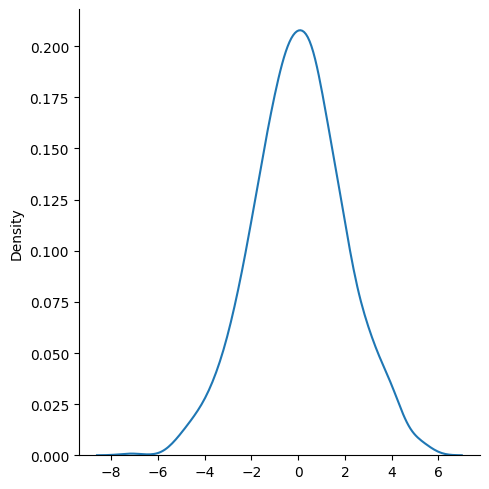

In [3]:
import seaborn as sns
sns.displot(sample_norm, kind='kde')

\
**CDF plot**

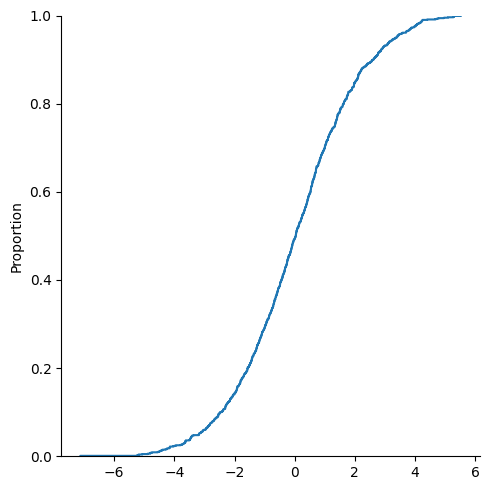

In [4]:
sns.displot(sample_norm, kind='ecdf')

\
<font color="#029DA3">**Standard deviation and coverage**</font>

Standard deviation (std) is denoted with the Greek lowercase letter sigma σ, describes the normalized spread of observations from the mean. We can calculate std using the numpy function, std().

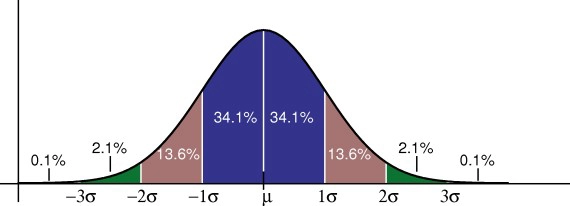

About 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean(μ); about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations.  
  
This fact is known as the 68-95-99.7 (empirical) rule, or the 3-σ rule.

In other words, the probability that a normal deviate lies in the range between μ - nσ when n = 1, 2, 3 are 0.682, 0.954, and 0.997, respectively.

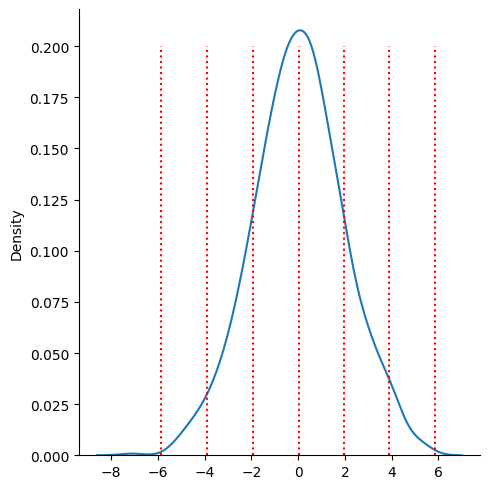

In [5]:
import matplotlib.pyplot as plt
sns.displot(sample_norm, kind='kde')

avg = np.mean(sample_norm)
std = np.std(sample_norm)
lines = [-3*std, -2*std, -std, avg, std, 2*std, 3*std]

plt.vlines(lines, 0, 0.2, colors='r', linestyles=':')

\
<font color="#029DA3">**Test of Normality**</font>

To test whether our data differs from a normal distribution or not, we can use the Shapiro test (usually one-tailed).

H<sub>0</sub>: sample is normal distributed  
H<sub>A</sub>: sample is not normal distributed

In [6]:
sample_norm = stats.norm.rvs(loc=0, #loc is mean (mu) of sample
                             scale=2, #scale is std of sample
                             size=1000, #size is n of sample
                             random_state=1234)
stats.shapiro(sample_norm)

ShapiroResult(statistic=np.float64(0.9985032779424902), pvalue=np.float64(0.5567761266483351))

The p-value >= 0.05, accept H<sub>0</sub> (fail to reject H<sub>0</sub>)

\
Let's try simulate sample with non-normal distribution.

In [7]:
sample_lognorm = stats.lognorm.rvs(s=0.5, #shape parameter, effects skewness
                                   size=1000,
                                   random_state=1234)
stats.shapiro(sample_lognorm)

ShapiroResult(statistic=np.float64(0.8956445277335966), pvalue=np.float64(1.725917080008456e-25))

The p-value < 0.05, reject accept H<sub>0</sub>, accept H<sub>A</sub>

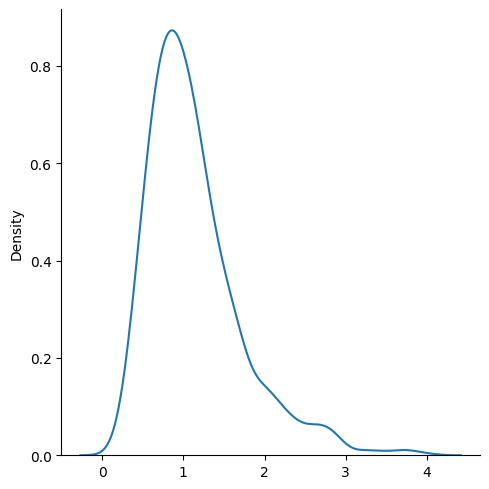

In [8]:
sns.displot(sample_lognorm , kind='kde')

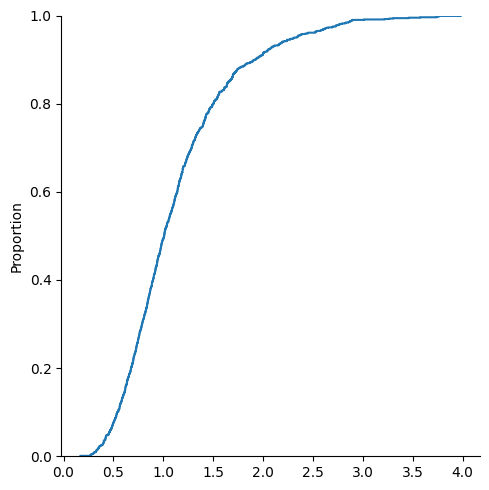

In [9]:
sns.displot(sample_lognorm , kind='ecdf')

\
<font color="#029DA3">**Kurtosis & Skewness**</font>

***Skewness***

Skewness is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0.  
- skewness is between -0.5 and 0.5, the data are fairly symmetrical
- skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
- skewness is less than -1 or greater than 1, the data are highly skewed


\
Let's begin with normal-distributed data.

In [10]:
sample_norm = stats.norm.rvs(loc=0, #loc is mean (mu) of sample
                             scale=2, #scale is std of sample
                             size=1000, #size is n of sample
                             random_state=1234)

\
Compute the skewness:

In [11]:
stats.skew(sample_norm)

np.float64(-0.023717398085798886)

\
Tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution (default two-tailed).

H<sub>0</sub>: skewness of sample is the same as that of a corresponding normal distribution  
H<sub>A</sub>: skewness of sample is *not* the same as that of a corresponding normal distribution

In [12]:
stats.skewtest(sample_norm)

SkewtestResult(statistic=np.float64(-0.30840399684731357), pvalue=np.float64(0.7577749410538418))

The p-value >= 0.05, accept H<sub>0</sub> (fail to reject H<sub>0</sub>)

\
Now let's try with skewed data.

In [13]:
sample_lognorm = stats.lognorm.rvs(s=1, #shape parameter, effects skewness
                                   size=1000,
                                   random_state=1234)

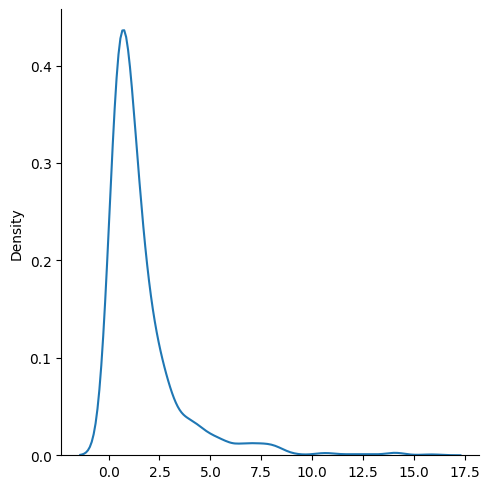

In [14]:
sns.displot(sample_lognorm, kind='kde')

\
Compute the skewness & test hypothesis:

In [15]:
stats.skew(sample_lognorm)

np.float64(3.127763664337733)

In [16]:
stats.skewtest(sample_lognorm)

SkewtestResult(statistic=np.float64(21.92673296970491), pvalue=np.float64(1.4443267934055867e-106))

The p-value < 0.05, accept H<sub>A</sub>, reject H<sub>0</sub>
&nbsp;   

\
***Kurtosis***

The kurtosis parameter is a measure of the combined weight of the tails relative to the rest of the distribution.  
So, kurtosis is all about the tails of the distribution – not the peakedness or flatness.  It measures the tail-heaviness of the distribution.

Most often, kurtosis is measured against the normal distribution.  
- If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.
- If the kurtosis is less than zero, then the distribution is light tails and is called a platykurtic distribution.  
- If the kurtosis is greater than zero, then the distribution has heavier tails and is called a leptokurtic distribution.  

(lepto=thin; platy=broad)

![](https://docs.scipy.org/doc/scipy/_images/scipy-stats-kurtosis-1.png)

\
Compute the kurtosis & hypothesis testing using normal distributed data:

In [17]:
sample_norm = stats.norm.rvs(loc=0, #loc is mean (mu) of sample
                             scale=1, #scale is std of sample
                             size=1000, #size is n of sample
                             random_state=1234)

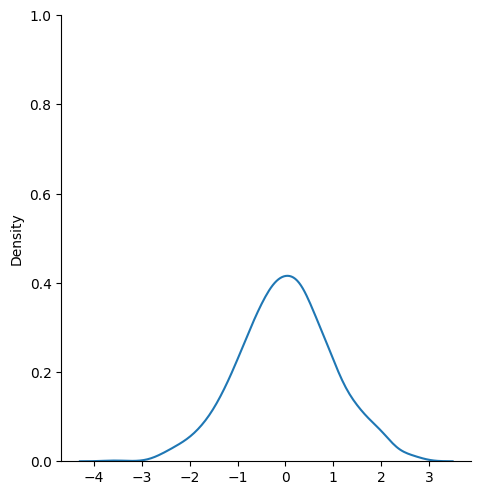

In [18]:
sns.displot(sample_norm, kind='kde').set(ylim=[0,1])

In [19]:
stats.kurtosis(sample_norm)

np.float64(0.02769682496639625)

\
Tests the null hypothesis that the kurtosis of the population from which the sample was drawn is that of the normal distribution (usually one-tailed).

H<sub>0</sub>: kurtosis of sample is the same as that of a corresponding normal distribution   
H<sub>A</sub>: kurtosis of sample is *not* the same as that of a corresponding normal distribution

In [20]:
stats.kurtosistest(sample_norm)

KurtosistestResult(statistic=np.float64(0.2922804424326845), pvalue=np.float64(0.7700722109486459))

The p-value >= 0.05, accept H<sub>0</sub> (fail to reject H<sub>0</sub>)

\
Compute the kurtosis & hypothesis testing using laplace distributed data:

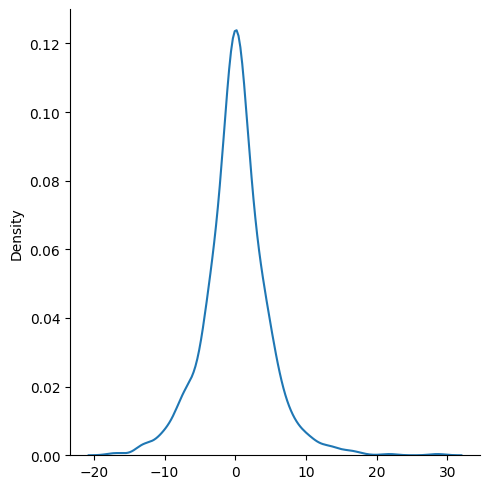

In [21]:
#Laplace distribution a.k.a. double exponential distribution > light tails, leptokurtic distribution.
sample_lap = stats.laplace.rvs(size=1000, scale=3, random_state=1234)
sns.displot(sample_lap, kind='kde')

In [22]:
stats.kurtosis(sample_lap)

np.float64(3.370837387496752)

In [23]:
stats.kurtosistest(sample_lap)

KurtosistestResult(statistic=np.float64(9.181028229410284), pvalue=np.float64(4.2699445965261175e-20))

The p-value < 0.05, accept H<sub>A</sub>, reject H<sub>0</sub>  
&nbsp;   

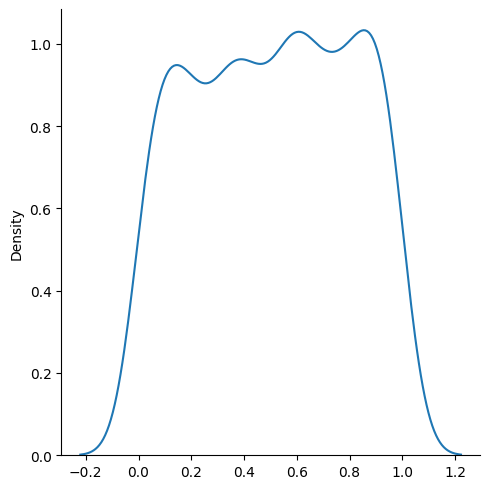

In [24]:
sample_uniform = stats.uniform.rvs(size=1000, random_state=1234)
sns.displot(sample_uniform, kind='kde')

In [25]:
stats.kurtosis(sample_uniform)

np.float64(-1.2196206040293132)

In [26]:
stats.kurtosistest(sample_lap)

KurtosistestResult(statistic=np.float64(9.181028229410284), pvalue=np.float64(4.2699445965261175e-20))

---

&nbsp;   
# <font color="#DE1509">Other Distributions</font>  

#### <font color="#127C02">*Uniform Distribution*</font>
A distribution function in which every possible result is equally likely; that is, the probability of each occurring is the same.  
- Discrete uniform distribution  
  Ex. the distribution of values obtained in tossing a fair die, which is equally likely to land showing any number from 1 to 6.
- Continuous uniform distribution  
  Ex. over some range, say from a to b, the sum of the probabilities for the entire range must equal 1 (something in the range must occur), and the probability for a value or event within some segment of the total range is equal to that segment’s proportion of the total range.

\
Generate data with continuous uniform distribution:

In [27]:
sample_uniform_continuous = stats.uniform.rvs(size=100000, #size is n of sample
                                              random_state=1234)

\
PDF of continuous uniform distribution:

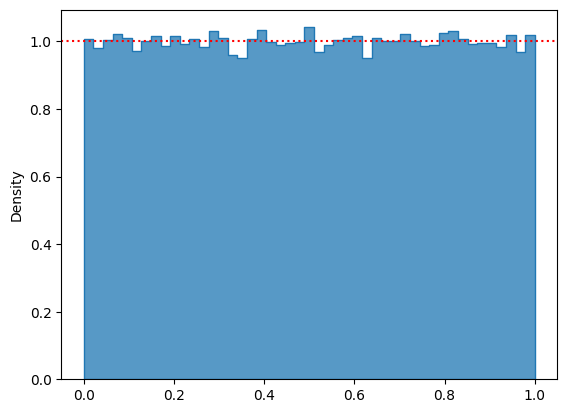

In [28]:
sns.histplot(sample_uniform_continuous, kde=False, stat="density", element='step')
plt.axhline(1, c='r', ls=':')

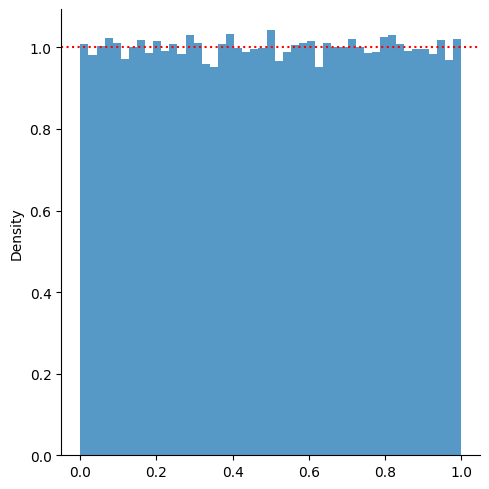

In [29]:
sns.displot(sample_uniform_continuous, kind='hist', stat="density", linewidth=0)
plt.axhline(1, c='r', ls=':')

\
CDF of continuous uniform distribution:

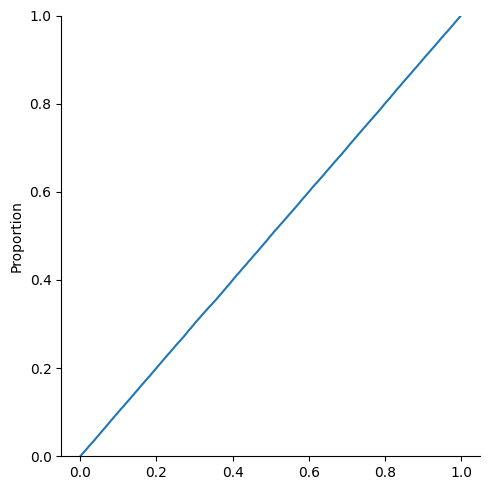

In [30]:
sns.displot(sample_uniform_continuous, kind='ecdf')

\
Generate data with discrete uniform distribution:

In [31]:
sample_uniform_discrete = stats.randint.rvs(low=1,
                                            high=7, #actual high value = 6
                                            size=1000,
                                            random_state=1234)

In [32]:
sample_uniform_discrete[1:20]

array([6, 5, 5, 1, 2, 2, 2, 3, 4, 5, 5, 3, 3, 1, 1, 5, 6, 1, 2])

\
PMF of discrete uniform distribution:

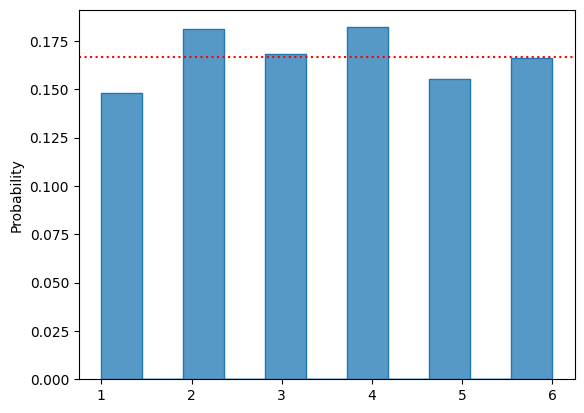

In [33]:
sns.histplot(sample_uniform_discrete, stat="probability", kde=False, element='step')
plt.axhline(1/6, c='r', ls=':')

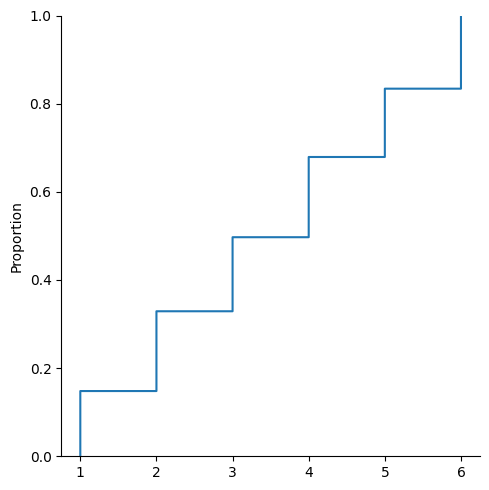

In [34]:
sns.displot(sample_uniform_discrete, kind='ecdf')

&nbsp;   
#### <font color="#127C02">*Log-normal distribution*</font>
log-normal (or lognormal) distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed.
It is a convenient and useful model for measurements in exact and engineering sciences, as well as medicine, economics and other topics (e.g., energies, concentrations, lengths, financial returns and other metrics).

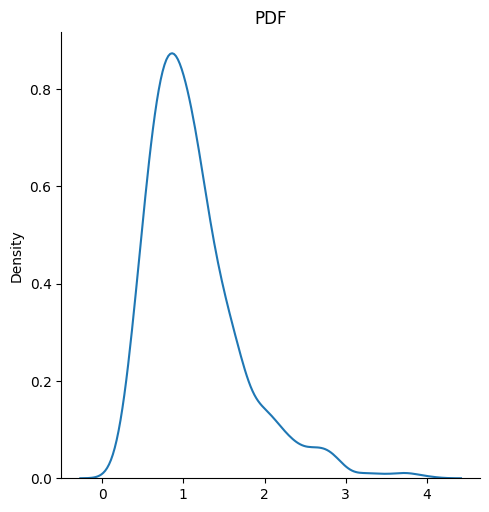

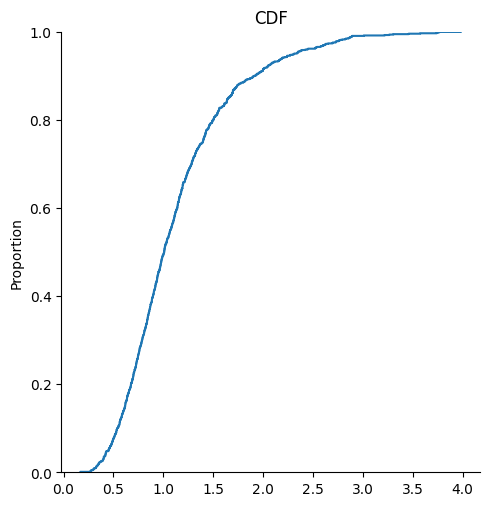

In [35]:
sample_lognorm = stats.lognorm.rvs(s=0.5,
                                   size=1000,
                                   random_state=1234)

sns.displot(data=sample_lognorm, kind='kde').set(title="PDF")
sns.displot(data=sample_lognorm, kind='ecdf').set(title="CDF")

&nbsp;   
#### <font color="#127C02">*More Distributions*</font>

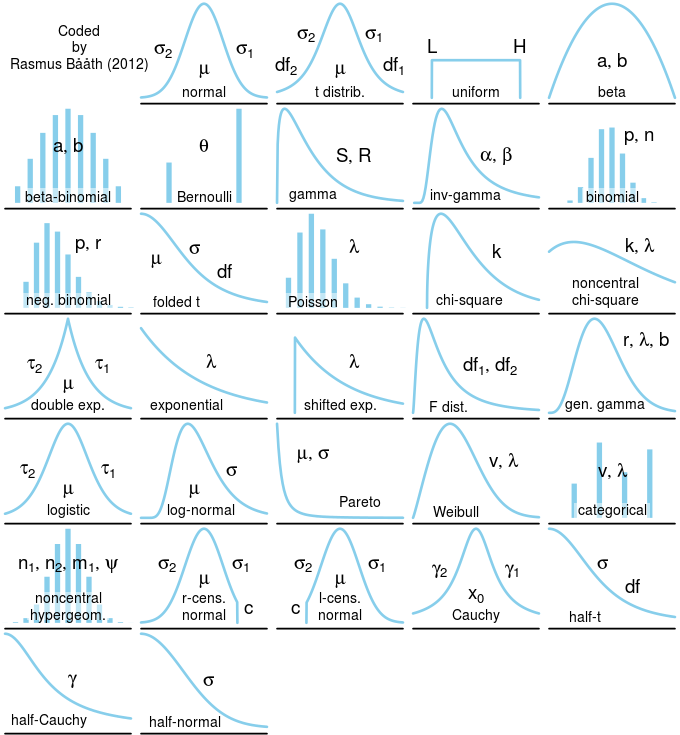

https://github.com/rasmusab/distribution_diagrams

For more information about other distributions, see https://en.wikipedia.org/wiki/List_of_probability_distributions